In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
nyc_tracts = gpd.read_file("NYC_censustracts.shp")

nyc_tracts.shape
#nyc_tracts.head()
#nyc_tracts.plot(figsize=(15,15))

(2195, 13)

In [3]:
# tract population
tractpop = pd.read_excel("~/Desktop/Spring 2022/Broadband Research/March 18/nyc_tractpop.xlsx", engine='openpyxl')
# tractpop.head()

In [4]:
nyc_tracts['GEOID']=nyc_tracts['GEOID'].astype(int)
tractpop['GEOID']=tractpop['GEOID'].astype(int)

In [5]:
nyc_tracts = nyc_tracts.merge(tractpop, on="GEOID")
nyc_tracts.rename(columns={'Total Estimate': 'Total Population'}, inplace=True)
nyc_tracts.shape

(2195, 15)

In [6]:
# data cleaning
table1 = pd.read_csv("ny1.csv")
table2 = pd.read_csv("ny2.csv")
table3 = pd.read_csv("ny3.csv")

form477=table1.append(table2).append(table3)

form477['BlockCode']=form477['BlockCode'].astype(str)
form477['BlockCode']=form477['BlockCode'].str[0:11]

form477 = form477[form477['BlockCode'].str.contains('36005|36047|36061|36081|36085')]

form477.rename(columns={'BlockCode': 'TractCode'}, inplace=True)

form477.shape

(59998, 15)

In [7]:
#data cleaning
form477_business = form477[['ProviderName','TractCode','Business']] 
form477_business = form477_business[form477_business.Business != 0] # prepare data

count1 = form477_business.groupby('TractCode').ProviderName.nunique() # find unique providers by tract

count1 = pd.DataFrame(count1) # prepare dataframe
count1 = count1.reset_index()
count1.columns = ['GEOID', 'Business_Providers'] 
count1['GEOID'] = count1['GEOID'].astype(int)

nyc_tracts = nyc_tracts.merge(count1, on="GEOID") # merge with geodata

In [8]:
#data cleaning
form477_consumer = form477[['ProviderName','TractCode','Consumer']] 
form477_consumer = form477_consumer[form477_consumer.Consumer != 0] # prepare data

count2 = form477_consumer.groupby('TractCode').ProviderName.nunique() # find unique providers by tract

count2 = pd.DataFrame(count2) # prepare dataframe
count2 = count2.reset_index()
count2.columns = ['GEOID', 'Consumer_Providers'] 
count2['GEOID'] = count2['GEOID'].astype(int)

nyc_tracts = nyc_tracts.merge(count2, on="GEOID") # merge with geodata

In [10]:
nyc_tracts['Business Providers Weighted'] = 1000 * nyc_tracts['Business_Providers']/nyc_tracts['Total Population']
nyc_tracts['Consumer Providers Weighted'] = 1000 * nyc_tracts['Consumer_Providers']/nyc_tracts['Total Population']
# nyc_tracts

In [13]:
nyc_tracts['Business Providers Weighted']=nyc_tracts['Business Providers Weighted'].replace([np.inf, -np.inf], 0) 
nyc_tracts['Consumer Providers Weighted']=nyc_tracts['Consumer Providers Weighted'].replace([np.inf, -np.inf], 0) 

<AxesSubplot:title={'center':'Providers for Business Fiber in NYC (Weighted by Population)'}>

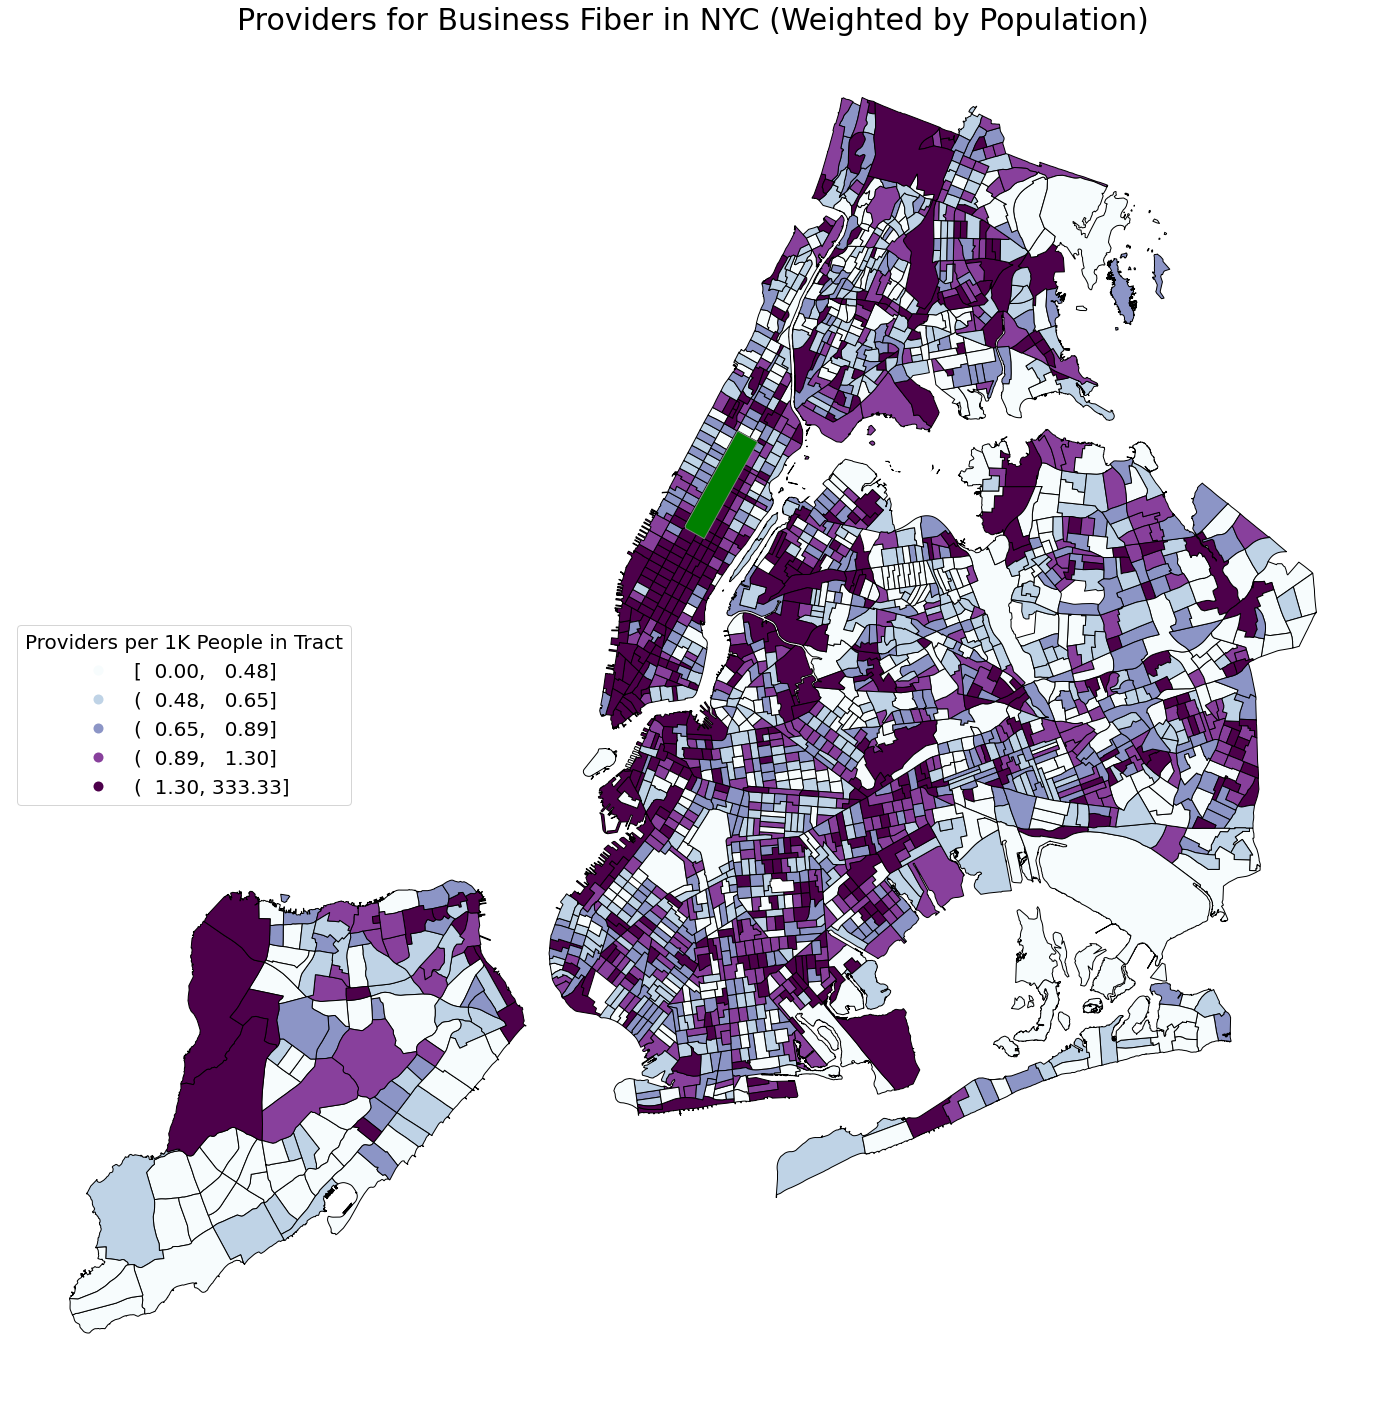

In [15]:
ax = nyc_tracts[nyc_tracts['GEOID']!=36061014300].plot(figsize=(25,25), column="Business Providers Weighted", scheme='quantiles',k=5,cmap='BuPu', edgecolor='k', legend=True, legend_kwds={'title':"Providers per 1K People in Tract",
                         'interval': True,'fontsize':20,'loc':'center left','title_fontsize':20})
ax.set_axis_off()
ax.set_title("Providers for Business Fiber in NYC (Weighted by Population)",fontsize=30)
plt.savefig('Providers for Business Fiber in NYC (Weighted).png')

outlier = nyc_tracts[nyc_tracts['GEOID']==36061014300]
outlier.plot(edgecolor=u'gray', color='green', ax=ax)
